In [18]:
import os, sys
import pandas as pd
import zipfile as zf
import requests

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import cluster
from sklearn.metrics import confusion_matrix
import urllib
import itertools
import pylab as pl
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

from __future__ import division

% pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/shay/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
df_2010 = pd.read_csv('Data/CollegeScorecard_Raw_Data/MERGED2010_11_PP.csv')
df_2011 = pd.read_csv('Data/CollegeScorecard_Raw_Data/MERGED2011_12_PP.csv')
df_2012 = pd.read_csv('Data/CollegeScorecard_Raw_Data/MERGED2012_13_PP.csv')
df_2013 = pd.read_csv('Data/CollegeScorecard_Raw_Data/MERGED2013_14_PP.csv')
df_2014 = pd.read_csv('Data/CollegeScorecard_Raw_Data/MERGED2014_15_PP.csv')

/Users/shay/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,6,1461,1561,1729) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/shay/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1537,1540,1542,1575,1606,1614,1615,1729) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/shay/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1537,1540,1542,1561,1575,1606,1614,1615,1729) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/shay/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,9,1379,1380,1381,1382,1383

In [3]:
comparva = ['INSTNM', 'MAIN', 'CDR3', 'LO_INC_DEBT_MDN', 'MD_INC_DEBT_MDN', 'HI_INC_DEBT_MDN', 
            'FIRST_GEN', 'ADM_RATE_ALL', 'AGE_ENTRY', 'INEXPFTE', 
            'CONTROL', 'COSTT4_A']

In [4]:
comparedf = {'2012': df_2012, '2013': df_2013, '2014': df_2014}
master = df_2011[comparva]
for yr, df in comparedf.iteritems():
    df = df[comparva]
    df = df[df.MAIN == 1]
    df.columns = ['INSTNM'] + [col + '_' + yr for col in df.columns[1:]]
    master = master.merge(df, on = 'INSTNM')

In [5]:
avgdf = master.groupby('CONTROL').mean()

In [6]:
master = master.convert_objects(convert_numeric = True)
master.dropna(inplace = True)

/Users/shay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [7]:
master.head()

,INSTNM,MAIN,CDR3,LO_INC_DEBT_MDN,MD_INC_DEBT_MDN,HI_INC_DEBT_MDN,FIRST_GEN,ADM_RATE_ALL,AGE_ENTRY,INEXPFTE,...,CDR3_2012,LO_INC_DEBT_MDN_2012,MD_INC_DEBT_MDN_2012,HI_INC_DEBT_MDN_2012,FIRST_GEN_2012,ADM_RATE_ALL_2012,AGE_ENTRY_2012,INEXPFTE_2012,CONTROL_2012,COSTT4_A_2012
0,Alabama A & M University,1,0.143,13232.0,12500.0,12000.0,0.376771,0.5010,20.981833,6841.0,...,0.165,13500.0,14264.0,16053.0,0.369764,0.5438,20.671380,8511.0,1,17351.0
1,University of Alabama at Birmingham,1,0.059,12000.0,11050.0,10604.5,0.347773,0.7223,23.479696,16681.0,...,0.070,12500.0,12500.0,12500.0,0.345912,0.7223,23.432805,17063.0,1,20441.0
3,University of Alabama in Huntsville,1,0.067,12500.0,13000.0,10500.0,0.321592,0.6368,23.811538,9590.0,...,0.084,12511.0,13614.0,12500.0,0.324873,0.7766,23.910538,9317.0,1,19687.0
4,Alabama State University,1,0.210,9500.0,9896.0,11582.0,0.434180,0.5080,21.138676,7581.0,...,0.190,10625.0,12500.0,12589.0,0.403549,0.4604,20.797425,8100.0,1,17533.0
5,The University of Alabama,1,0.056,12782.0,13937.5,13796.5,0.276011,0.4353,21.488106,10197.0,...,0.082,13360.0,14957.5,15000.0,0.264231,0.5308,21.523657,9977.0,1,23939.0


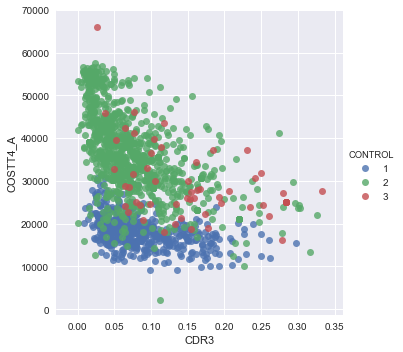

In [9]:
fig = pl.figure(figsize = (10, 10))
sns.lmplot('CDR3', 'COSTT4_A', master, hue = 'CONTROL', fit_reg = False)

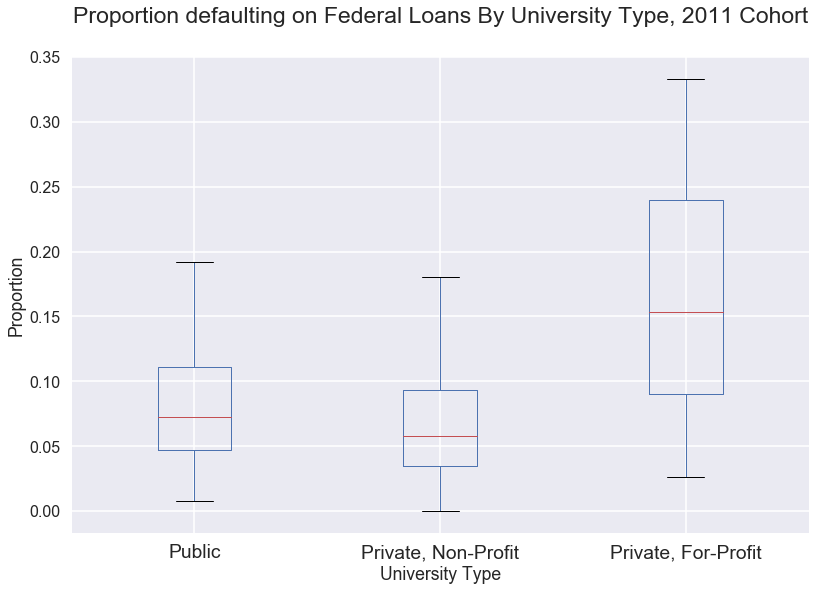

In [10]:
sns.set_context('poster')
pl.figsize = (10, 10)
master.boxplot('CDR3', by = 'CONTROL')
pl.suptitle('Proportion defaulting on Federal Loans By University Type, 2011 Cohort')
pl.title('')
pl.ylabel('Proportion')
pl.xlabel('University Type')
pl.xticks([1, 2, 3], ['Public', 'Private, Non-Profit', 'Private, For-Profit'])
pl.savefig('fedloans.png')

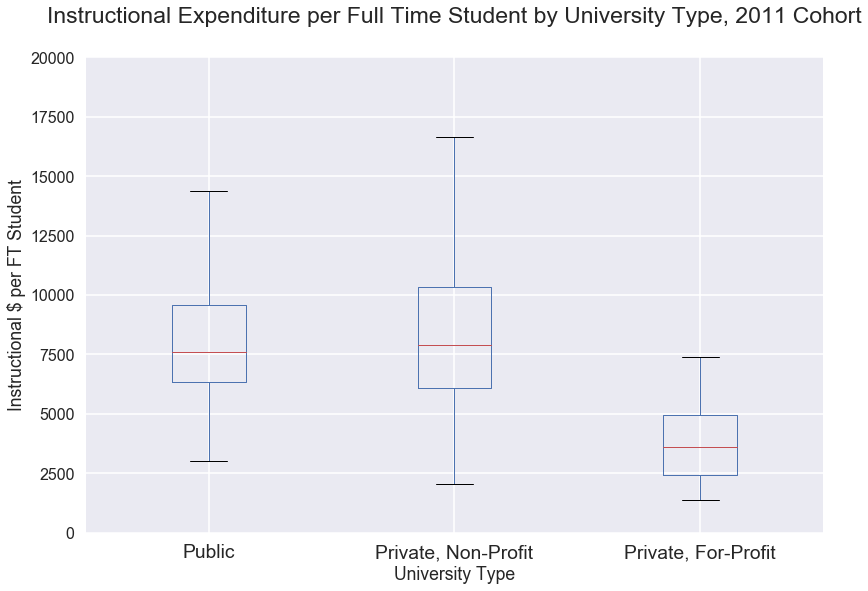

In [11]:
sns.set_context('poster')
pl.figure(figsize = (10, 10))
master.boxplot('INEXPFTE', by = 'CONTROL')
pl.suptitle('Instructional Expenditure per Full Time Student by University Type, 2011 Cohort')
pl.title('')
pl.ylabel('Instructional $ per FT Student')
pl.ylim(0, 20000)
pl.xlabel('University Type')
pl.xticks([1, 2, 3], ['Public', 'Private, Non-Profit', 'Private, For-Profit'])
pl.savefig('instructionalexp.png')

In [13]:
for df in [df_2011, df_2012, df_2013, df_2014]:
    df = df[df.MAIN == 1]
    print len(df)

5755
5759
5707
5685


In [51]:
def limitdf(df, varlist, dummies = 0): 
    '''Takes dataframe, list of variables of interest 
    and list of variables to turn into dummies and returns
    clean dataframe
    '''
    
    smaller = df[varlist]
    smaller = smaller.convert_objects(convert_numeric = True)
    smallest = smaller.dropna()
    if dummies != 0: 
        for var in dummies: 
            controldums = pd.get_dummies(df[var])
            smallest = smallest.join(controldums)
            smallest.drop(var, inplace = True, axis = 1)

    return smallest

def testmodel(df, yvar, test_size = .33, max_depth = 8): 
    y = df[yvar]
    x = df.drop(yvar, axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                test_size=test_size, random_state=42)
    randfor = RandomForestRegressor(oob_score = True, n_estimators = 100,
                                    max_depth = max_depth, random_state = 23)
    fitted = randfor.fit(X_train, y_train)
    ypred = fitted.predict(X_test)
    ypred_is = fitted.predict(X_train)
    print 'Insample: {0}, OutSample: {1}'.format(fitted.score(X_train, y_train), fitted.score(X_test, y_test))
    print 'Feature Importance'
    for i, feature in enumerate(X_train.columns):
        print feature, round(fitted.feature_importances_[i], 3)
    return y_train, ypred_is, y_test, ypred

In [16]:
varlist = ['CDR3', 'LO_INC_DEBT_MDN', 'MD_INC_DEBT_MDN', 
           'HI_INC_DEBT_MDN', 'FIRST_GEN', 'COMP_ORIG_YR4_RT', 'ADM_RATE_ALL', 'AGE_ENTRY', 
           'INEXPFTE', 'CONTROL']

# Compare effect sizes for 2011 cohort

/Users/shay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


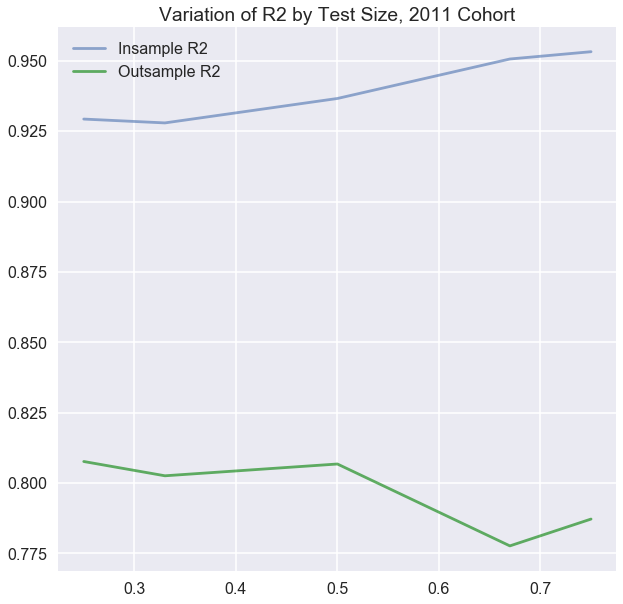

In [56]:
sns.set_context('poster')
outsample = []
insample = []
size_list = [.25, .33, .5, .67, .75]
for size in [.25, .33, .5, .67, .75]:
    limited_2011 = limitdf(df_2011, varlist, ['CONTROL'])
    y = limited_2011['CDR3']
    x = limited_2011.drop('CDR3', axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = size, 
                                                        random_state=42)
    randfor = RandomForestRegressor(oob_score = True, random_state = 23, 
                                    max_depth = 8, n_estimators = 100)
    fitted = randfor.fit(X_train, y_train)
    outsample.append(fitted.score(X_test, y_test))
    insample.append(fitted.score(X_train, y_train))
pl.figure(figsize = (10, 10))
pl.plot(size_list, insample, '-', alpha = .6, label = 'Insample R2')
pl.plot(size_list, outsample, '-', alpha = .6, color = 'green', label = 'Outsample R2')
pl.legend()
pl.title('Variation of R2 by Test Size, 2011 Cohort')
pl.savefig('Testsize.png')

# Compare effect of max tree depth on 2011 cohort

/Users/shay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


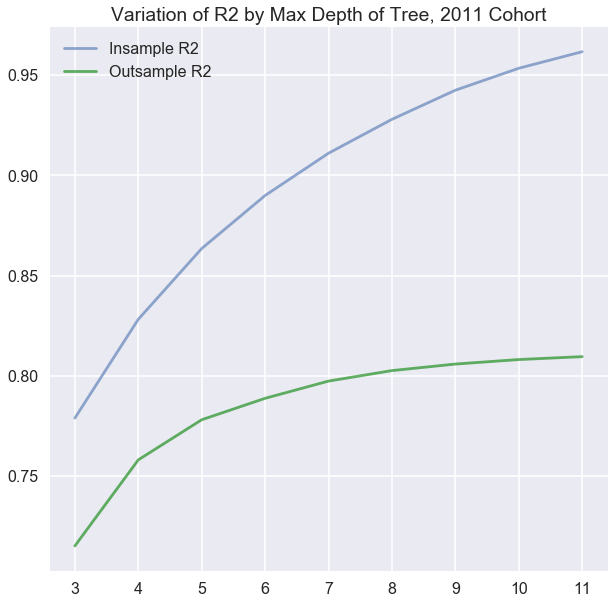

In [55]:
sns.set_context('poster')
outsample = []
insample = []
depth_list = np.arange(3, 12, 1)
for depth in depth_list:
    limited_2011 = limitdf(df_2011, varlist, ['CONTROL'])
    y = limited_2011['CDR3']
    x = limited_2011.drop('CDR3', axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, 
                                                        random_state=42)
    randfor = RandomForestRegressor(oob_score = True, max_depth = depth, 
                                    n_estimators = 100, random_state = 23)
    fitted = randfor.fit(X_train, y_train)
    outsample.append(fitted.score(X_test, y_test))
    insample.append(fitted.score(X_train, y_train))
pl.figure(figsize = (10, 10))
pl.plot(depth_list, insample, '-', alpha = .6, label = 'Insample R2')
pl.plot(depth_list, outsample, '-', alpha = .6, color = 'green', label = 'Outsample R2')
pl.legend()
pl.title('Variation of R2 by Max Depth of Tree, 2011 Cohort')
pl.savefig('Max_Depth.png')

# Models trained and tested within cohort for 2011-2013, max depth = 8

/Users/shay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Insample: 0.927949347855, OutSample: 0.802580061109
Feature Importance
LO_INC_DEBT_MDN 0.043
MD_INC_DEBT_MDN 0.123
HI_INC_DEBT_MDN 0.035
FIRST_GEN 0.532
COMP_ORIG_YR4_RT 0.108
ADM_RATE_ALL 0.025
AGE_ENTRY 0.027
INEXPFTE 0.031
1 0.001
2 0.001
3 0.073


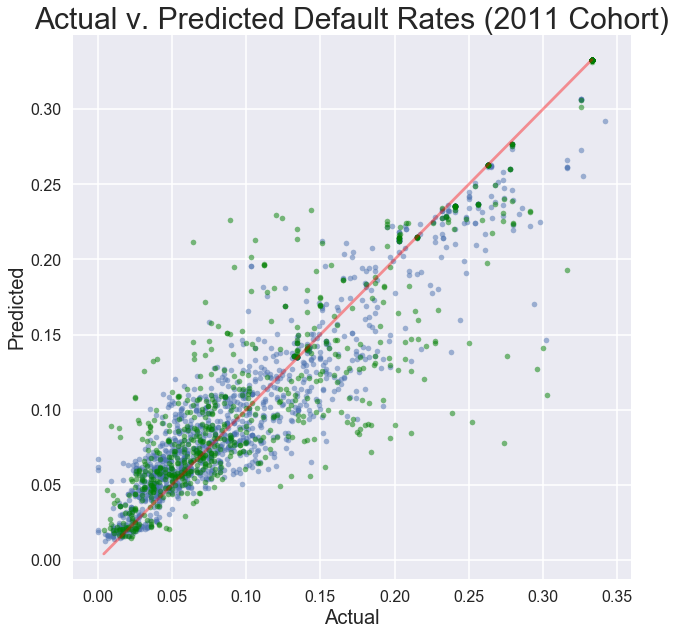

In [57]:
ytrain_act, ytrain_pred, ytest_act, ytest_pred = testmodel(limitdf(df_2011, varlist, 
                                                            ['CONTROL']), 'CDR3')

pl.figure(figsize = (10, 10))
pl.plot(ytrain_act, ytrain_pred, '.', alpha = .5, label = 'Training')
pl.plot(ytest_act, ytest_pred, '.', alpha = .5, color = 'green', label = 'Test')
line = np.linspace(ytest_act.min(), ytest_act.max(), 100)
pl.plot(line, line, alpha =.4, color = 'red')
pl.title('Actual v. Predicted Default Rates (2011 Cohort)', size = 30)
pl.xlabel('Actual', size = 20)
pl.ylabel('Predicted', size = 20)
pl.savefig('results2011.png')

/Users/shay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Insample: 0.921830039816, OutSample: 0.825771490993
Feature Importance
LO_INC_DEBT_MDN 0.04
MD_INC_DEBT_MDN 0.026
HI_INC_DEBT_MDN 0.032
FIRST_GEN 0.557
COMP_ORIG_YR4_RT 0.205
ADM_RATE_ALL 0.025
AGE_ENTRY 0.066
INEXPFTE 0.023
1 0.001
2 0.003
3 0.022


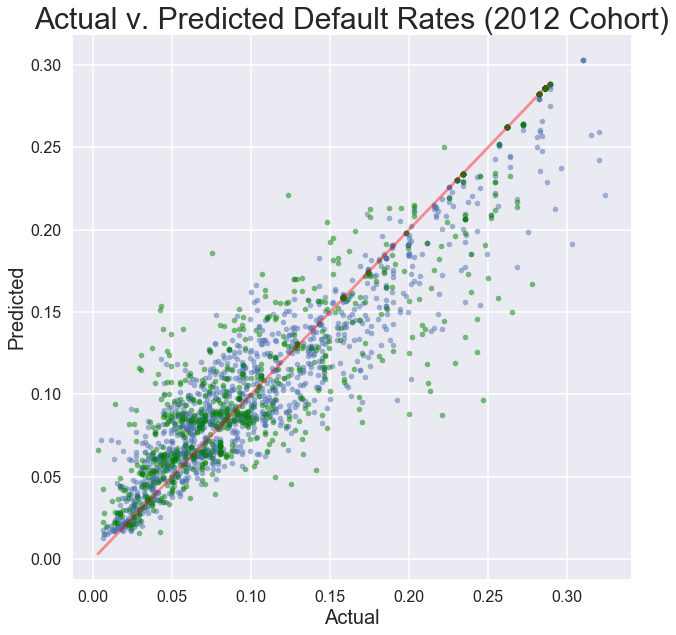

In [58]:
ytrain_act, ytrain_pred, ytest_act, ytest_pred = testmodel(limitdf(df_2012, varlist, 
                                                            ['CONTROL']), 'CDR3')

pl.figure(figsize = (10, 10))
pl.plot(ytrain_act, ytrain_pred, '.', alpha = .5, label = 'Training')
pl.plot(ytest_act, ytest_pred, '.', alpha = .5, color = 'green', label = 'Test')
line = np.linspace(ytest_act.min(), ytest_act.max(), 100)
pl.plot(line, line, alpha =.4, color = 'red')
pl.title('Actual v. Predicted Default Rates (2012 Cohort)', size = 30)
pl.xlabel('Actual', size = 20)
pl.ylabel('Predicted', size = 20)
pl.savefig('results2012.png')

/Users/shay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Insample: 0.915401106247, OutSample: 0.772523615623
Feature Importance
LO_INC_DEBT_MDN 0.035
MD_INC_DEBT_MDN 0.023
HI_INC_DEBT_MDN 0.033
FIRST_GEN 0.179
COMP_ORIG_YR4_RT 0.461
ADM_RATE_ALL 0.037
AGE_ENTRY 0.048
INEXPFTE 0.021
1 0.002
2 0.004
3 0.158


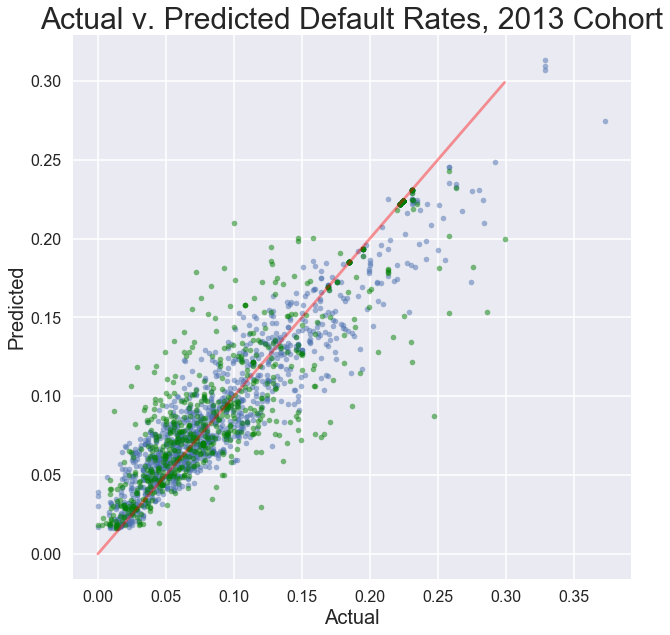

In [59]:
ytrain_act, ytrain_pred, ytest_act, ytest_pred = testmodel(limitdf(df_2013, varlist, 
                                                            ['CONTROL']), 'CDR3')

pl.figure(figsize = (10, 10))
pl.plot(ytrain_act, ytrain_pred, '.', alpha = .5, label = 'Training')
pl.plot(ytest_act, ytest_pred, '.', alpha = .5, color = 'green', label = 'Test')
line = np.linspace(ytest_act.min(), ytest_act.max(), 100)
pl.plot(line, line, alpha =.4, color = 'red')
pl.title('Actual v. Predicted Default Rates, 2013 Cohort', size = 30)
pl.xlabel('Actual', size = 20)
pl.ylabel('Predicted', size = 20)
pl.savefig('results2013.png')

In [24]:
def stdze(df):
    for col in df.columns: 
        if col in [1, 2 ,3, 'CDR3']: 
            pass
        else: 
            df[col] = df[col].apply(lambda x: (x - df[col].mean()) / df[col].std())
    return df

/Users/shay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Insample: 0.911525994274, OutSample: 0.659104435317
Feature Importance
LO_INC_DEBT_MDN 0.05
MD_INC_DEBT_MDN 0.119
HI_INC_DEBT_MDN 0.054
FIRST_GEN 0.422
COMP_ORIG_YR4_RT 0.106
ADM_RATE_ALL 0.024
AGE_ENTRY 0.031
INEXPFTE 0.027
1 0.002
2 0.001
3 0.165


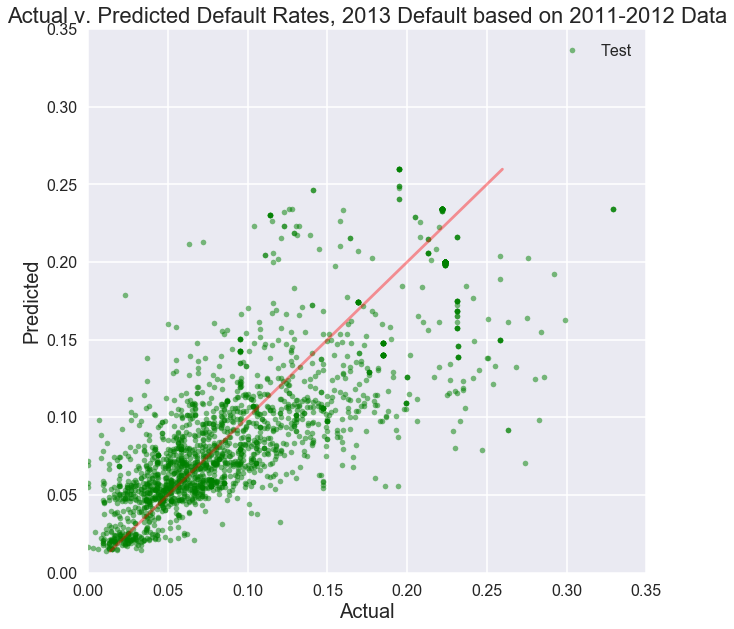

In [69]:
limited2011 = limitdf(df_2011, varlist, ['CONTROL'])
limited2013 = limitdf(df_2013, varlist, ['CONTROL'])
y = limited2011['CDR3']
x = limited2011.drop('CDR3', axis = 1)
y_2013 = limited2013['CDR3']
x_2013 = limited2013.drop('CDR3', axis = 1)
randfor = RandomForestRegressor(oob_score = True, max_depth = 8, random_state = 42)
fitted = randfor.fit(x, y)
ypred_2013 = fitted.predict(x_2013)
ypred_is = fitted.predict(X_train)
print 'Insample: {0}, OutSample: {1}'.format(fitted.score(x, y), 
                                             fitted.score(x_2013, y_2013))
print 'Feature Importance'
for i, feature in enumerate(X_train.columns):
    print feature, round(fitted.feature_importances_[i], 3)
pl.figure(figsize = (10, 10))
#pl.plot(y_train, ypred_is, '.', alpha = .5, label = 'Train')
pl.plot(y_2013, ypred_2013, '.', alpha = .5, color = 'green', label = 'Test')
line = np.linspace(ypred_2013.min(), ypred_2013.max(), 100)
pl.plot(line, line, alpha =.4, color = 'red')
pl.title('Actual v. Predicted Default Rates, 2013 Default based on 2011-2012 Data', size = 22)
pl.xlabel('Actual', size = 20)
pl.ylabel('Predicted', size = 20)
pl.legend()
pl.ylim(0, .35)
pl.xlim(0, .35)
pl.savefig('2013from2011.png')
    

# Train on average of 2011 & 2012 data, test on 2013

In [62]:
df1 = limitdf(df_2011, varlist + ['INSTNM'], ['CONTROL'])
df2 = limitdf(df_2012, varlist + ['INSTNM'], ['CONTROL'])
df3 = limitdf(df_2013, varlist + ['INSTNM'], ['CONTROL'])


/Users/shay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [63]:
for df in [df1, df2, df3]:
    print len(df)

2122
2151
2052


In [64]:
masterdf = df1.merge(df2, on = 'INSTNM', suffixes = ('2011', '2012'))
masterdf = masterdf.merge(df3, on = 'INSTNM')
masterdf.set_index('INSTNM', inplace = True)

In [65]:
for col in df1.columns: 
    if col == 'INSTNM': 
        pass
    else: 
        colstoavg = [str(col)+'2011', str(col)+'2012']
        masterdf[str(col) + 'avg'] = masterdf[colstoavg].mean(axis = 1)

/Users/shay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Insample: 0.930790768402, OutSample: 0.618917798847
Feature Importance
LO_INC_DEBT_MDN 0.04
MD_INC_DEBT_MDN 0.023
HI_INC_DEBT_MDN 0.067
FIRST_GEN 0.556
COMP_ORIG_YR4_RT 0.15
ADM_RATE_ALL 0.023
AGE_ENTRY 0.034
INEXPFTE 0.025
1 0.003
2 0.001
3 0.077


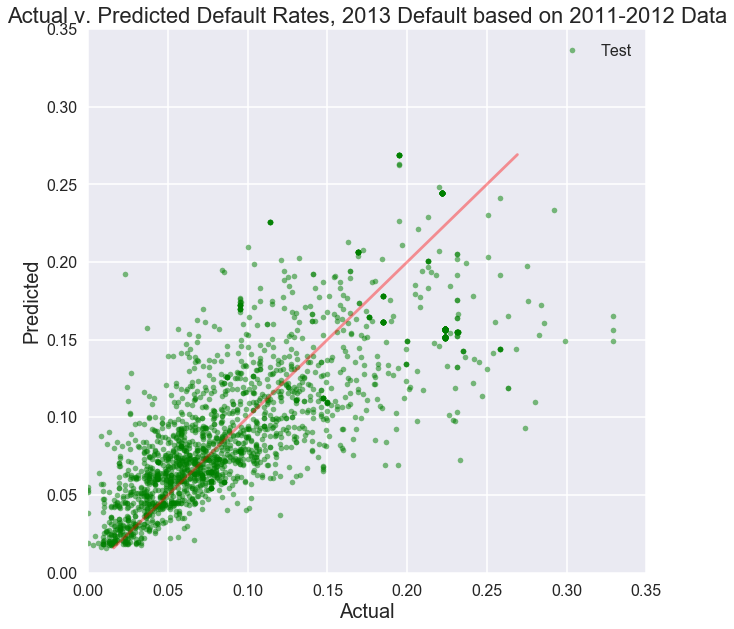

In [70]:
varsavgs = [u'LO_INC_DEBT_MDNavg',
         u'MD_INC_DEBT_MDNavg',   u'HI_INC_DEBT_MDNavg',
               u'FIRST_GENavg',  u'COMP_ORIG_YR4_RTavg',
            u'ADM_RATE_ALLavg',         u'AGE_ENTRYavg',
                u'INEXPFTEavg',             1, 2, 3, 'CDR3avg']

limitedmaster = limitdf(masterdf, varsavgs)
y = limitedmaster['CDR3avg']
x = limitedmaster.drop('CDR3avg', axis = 1)
y_2013 = limited2013['CDR3']
x_2013 = limited2013.drop('CDR3', axis = 1)

randfor = RandomForestRegressor(oob_score = True, max_depth = 8)
fitted = randfor.fit(x, y)
ypred_2013 = fitted.predict(x_2013)
ypred_is = fitted.predict(X_train)
print 'Insample: {0}, OutSample: {1}'.format(fitted.score(x, y), 
                                             fitted.score(x_2013, y_2013))
print 'Feature Importance'
for i, feature in enumerate(X_train.columns):
    print feature, round(fitted.feature_importances_[i], 3)

pl.figure(figsize = (10, 10))
#pl.plot(y_train, ypred_is, '.', alpha = .5, label = 'Train')
pl.plot(y_2013, ypred_2013, '.', alpha = .5, color = 'green', label = 'Test')
line = np.linspace(ypred_2013.min(), ypred_2013.max(), 100)
pl.plot(line, line, alpha =.4, color = 'red')
pl.title('Actual v. Predicted Default Rates, 2013 Default based on 2011-2012 Data', size = 22)
pl.xlabel('Actual', size = 20)
pl.ylabel('Predicted', size = 20)
pl.legend()
pl.ylim(0, .35)
pl.xlim(0, .35)
pl.savefig('2013blended.png')

In [ ]:
masterdf.